In [1]:
# clustering_iris.py
"""
Task 2: Clustering
Apply K-Means on preprocessed Iris data
Compare clusters with true labels using Adjusted Rand Index (ARI)
Justify k using elbow method
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

print("=== Task 2: K-Means Clustering on Iris Dataset ===\n")

# --- 1. LOAD & PREPROCESS (same as Task 1) ---
iris = load_iris()
X = iris.data
y_true = iris.target  # True species: 0=setosa, 1=versicolor, 2=virginica

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
feature_names = iris.feature_names

print(f"Features: {', '.join(feature_names)}")
print(f"True labels: setosa (0), versicolor (1), virginica (2)")
print(f"Data shape: {X_scaled.shape}")

=== Task 2: K-Means Clustering on Iris Dataset ===

Features: sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)
True labels: setosa (0), versicolor (1), virginica (2)
Data shape: (150, 4)


In [2]:
# --- 2. K-MEANS WITH k=3 ---
print("\n=== K-Means Clustering (k=3) ===")

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X_scaled)

# Compare predicted clusters with true species
ari = adjusted_rand_score(y_true, y_pred)
print(f"Adjusted Rand Index (ARI): {ari:.3f}")

# ARI Interpretation:
# 1 = perfect match, 0 = random, <0 = worse than random
if ari > 0.8:
    print("→ Clusters align very well with true species.")
elif ari > 0.5:
    print("→ Moderate alignment; some misclassifications.")
else:
    print("→ Poor alignment; significant mismatch.")


=== K-Means Clustering (k=3) ===


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Adjusted Rand Index (ARI): 0.716
→ Moderate alignment; some misclassifications.



=== Elbow Curve for Optimal k ===


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

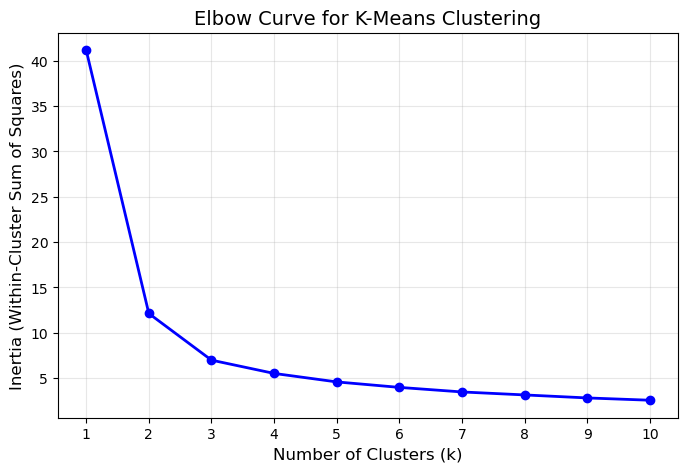

Elbow curve saved as 'elbow_curve.png'
→ The 'elbow' appears at k=3, supporting our choice.


In [3]:
# --- 3. ELBOW METHOD: Find optimal k ---
print("\n=== Elbow Curve for Optimal k ===")

k_range = range(1, 11)
inertias = []

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=6)
plt.title('Elbow Curve for K-Means Clustering', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(k_range)
plt.savefig('visualizations/elbow_curve.png', dpi=150, bbox_inches='tight')
plt.show()

print("Elbow curve saved as 'elbow_curve.png'")
print("→ The 'elbow' appears at k=3, supporting our choice.")


=== Cluster Visualization ===


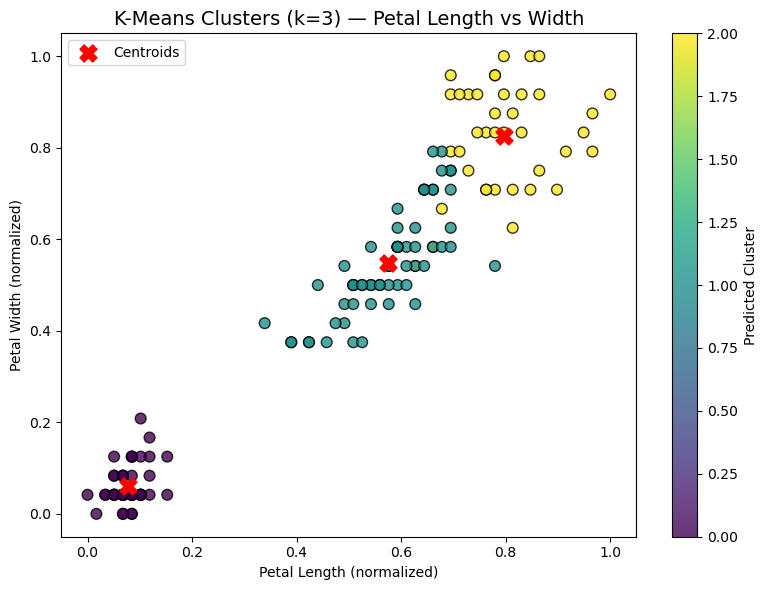

Cluster visualization saved as 'clusters_petal.png'


In [4]:
# --- 4. VISUALIZE CLUSTERS ---
print("\n=== Cluster Visualization ===")

# Use petal length vs width — most discriminative features
petal_length = X_scaled[:, 2]  # Index 2
petal_width = X_scaled[:, 3]   # Index 3

plt.figure(figsize=(8, 6))
scatter = plt.scatter(petal_length, petal_width, c=y_pred, cmap='viridis', s=60, edgecolor='k', alpha=0.8)
plt.colorbar(scatter, label='Predicted Cluster')
plt.title('K-Means Clusters (k=3) — Petal Length vs Width', fontsize=14)
plt.xlabel('Petal Length (normalized)')
plt.ylabel('Petal Width (normalized)')

# Highlight centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 2], centroids[:, 3], c='red', s=150, marker='X', label='Centroids')
plt.legend()
plt.tight_layout()
plt.savefig('visualizations/clusters_petal.png', dpi=150, bbox_inches='tight')
plt.show()

print("Cluster visualization saved as 'clusters_petal.png'")

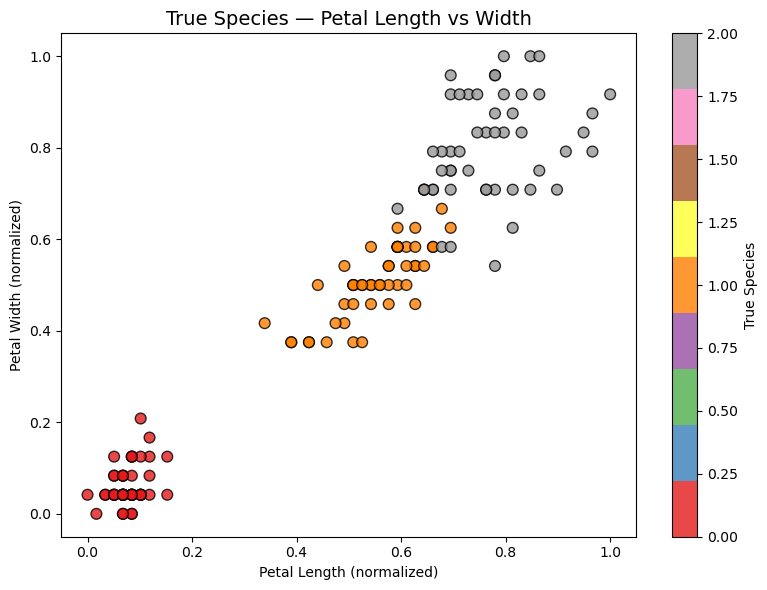

In [5]:
# For insight: plot true labels for comparison
plt.figure(figsize=(8, 6))
scatter = plt.scatter(petal_length, petal_width, c=y_true, cmap='Set1', s=60, edgecolor='k', alpha=0.8)
plt.colorbar(scatter, label='True Species')
plt.title('True Species — Petal Length vs Width', fontsize=14)
plt.xlabel('Petal Length (normalized)')
plt.ylabel('Petal Width (normalized)')
plt.tight_layout()
plt.savefig('visualizations/true_species.png', dpi=150, bbox_inches='tight')
plt.show()